# The AR Model

The AR model is the most basic building block of univariate time series. As you have seen before, univariate time series are a family of models that use only information about the past of the target variable to forecast its future, and they do not rely on other explanatory variables.

## Listing 3-1. Describing a dataframe

In [ ]:
import pandas as pd

# Import the dataframe
#eq = pd.read_csv('Ch03_Earthquake_database.csv')

#url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPredictionWS2023/main/database.csv'
url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPredictionWS2023/main/Ch03_Earthquake_database.csv'
eq = pd.read_csv(url)


# Describe the dataframe
eq.describe()


,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


## Listing 3-2. Profiling a dataframe

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=118396f42b08f729a66827da25a8bbcddf579237d9634e429bc144d6431263db
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unins

In [ ]:
#!pip install typing-extensions --upgrade

!pip install typing_extensions==4.6 --upgrade

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.4.2 requires typing-extensions>=4.6.1, but you have typing-extensions 4.6.0 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.6.0 which is incompatible.
typeguard 4.1.5 requires typing-extensions>=4.7.0; python_version < "3.12", but you have typing-extensions 4.6.0 which is incompatible.


In [ ]:
# Import the pandas profiling package
from pandas_profiling import ProfileReport

# Get the pandas profiling report
eq.profile_report()


ImportError: ignored

## Listing 3-3. Convert the earthquake data to the yearly number of earthquake

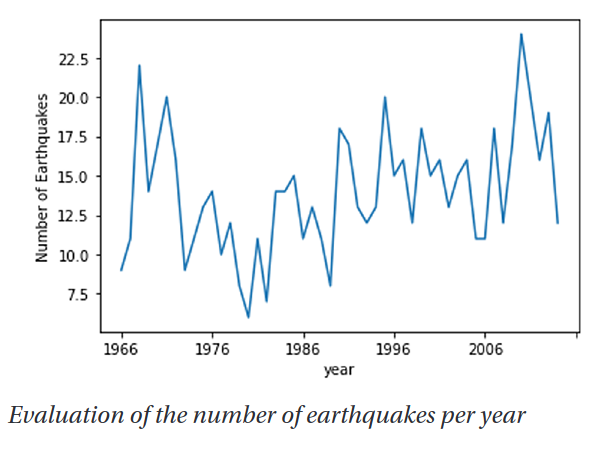

In [ ]:
import matplotlib.pyplot as plt

# Convert years to dates
eq['year'] = pd.to_datetime(eq['Date']).dt.year

# Filter on earthquakes with magnitude of 7 or higher
eq = eq[eq['Magnitude'] >= 7]

# Compute a count of earthquakes per year
earthquakes_per_year = eq.groupby('year').count()

# Remove erroneous values for year
earthquakes_per_year = earthquakes_per_year.iloc[1:-2, 0]

# Make a plot of earthquakes per year
ax = earthquakes_per_year.plot()
ax.set_ylabel("Number of Earthquakes")
plt.show()


AttributeError: ignored

## Listing 3-4. Convert the earthquake data to the yearly number of earthquake

In [ ]:
shifts = pd.DataFrame(
    {
        'this year': earthquakes_per_year,
        'past year': earthquakes_per_year.shift(1)
    }
)

ax = shifts.plot()
ax.set_ylabel('Number of Earthquakes')
plt.show()


NameError: ignored

## Listing 3-5. Drop missing data

In [ ]:
shifts = shifts.dropna()

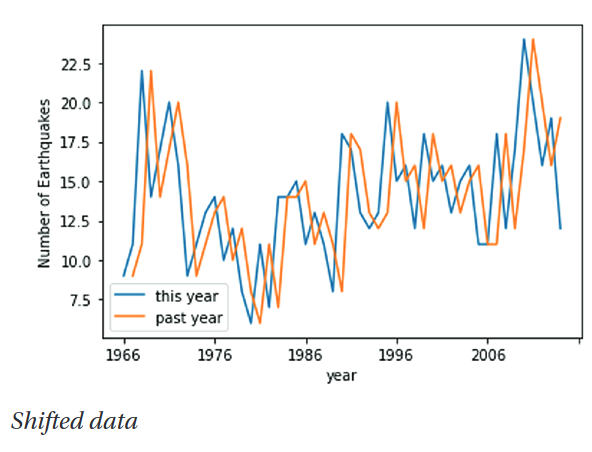

## Listing 3-6. Compute a correlation matrix for the shifts dataframe

In [ ]:
shifts.corr()

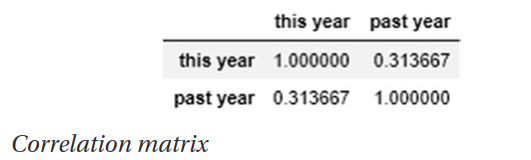

Positive and Negative Autocorrelation

Just like “regular” correlation, autocorrelation can be positive or negative. Positive autocorrelation means that a high value now will likely give a high value in the next period. This can, for example, be observed in stock trading: as soon as many people want to buy a stock, its price goes up. This positive trend makes people want to buy this stock even more as it has positive results. The more people buy the stock, the more it goes up and the more people may want to buy it.

A positive correlation also works on downtrends. If today’s stock value is low, then itis likely that tomorrow’s value would be even lower, as people start selling. When a lot of people sell, the value drops, and even more people will want to sell. This is also a case of positive autocorrelation as the past and the present go in the same direction. If the past is low, the present is low; and if the past is high, the present is high.

Negative autocorrelation exists if two trends are oppositive. This is the case in the doctor’s consultation durations example. If one consultation takes longer, the next one will take shorter. If one consultation takes less time, the doctor may take a bit more time on the next one.

Stationarity and the ADF Test

The problem of having a trend in your data is general in univariate time series modeling. The stationarity of a time series means that a time series does not have a (long-term) trend: it is stable around the same average. If not, you say that a time series is non-stationary.

AR models can theoretically have a trend coefficient in the model, yet since
stationarity is an important concept in the general theory of time series, it is better to learn how to deal with it right away.

A lot of models can only work on stationary time series.

A time series that is strongly growing or diminishing over time is obvious to spot. But sometimes it is difficult to tell whether a time series is stationary. This is where the Augmented Dickey Fuller (ADF) test comes in useful. The Augmented Dickey Fuller test is a hypothesis test that allows you to test whether a time series is stationary.

## Listing 3-7. Augmented Dicky Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(earthquakes_per_year.dropna())
print(result)

pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')


In the earthquake data case, you will see a p-value that is smaller than 0.05 (the reference value), and this means that the series is theoretically stationary: you don’t have to change anything to apply the AR model

**Note:**

If you’re not familiar with hypothesis testing, you should know that the
p-value is the conclusive value for a hypothesis test. In a hypothesis test, you
try to prove an alternative hypothesis against a null hypothesis. the p-value
indicates the probability that you would observe the data that you have observed
if the null hypothesis were true. If this probability is low, you conclude that
the null hypothesis must be wrong and therefore the alternative must be true.
the reference value for the p-value is generally 0.05 but may differ for certain
applications.

Differencing a Time Series
Even though the ADF test tells you that the data is stationary, you have seen that the autocorrelation is positive where you would expect a negative one. The hypothesis was that this could be caused by a trend.

You now have two opposing indicators. One tells you that the data is stationary, and the other one tells you that there is a trend. To be safe, it is better to remove the trend anyway. This can be done by differencing.

Differencing means that rather than modeling the original values of the time series, you model the differences between each value and the next. Even though there is a trend in the actual data, there will probably not be a trend in the differenced data.

To confirm, you can do an ADF test again. If it is still not good, you can difference the differenced time series again, until you obtain a correct result.

## Listing 3-8. Differencing in pandas

In [ ]:
# Difference the data
differenced_data = earthquakes_per_year.diff().dropna()

# Plot the differenced data
ax = differenced_data.plot()
ax.set_ylabel('Differenced number of Earthquakes')
plt.show()


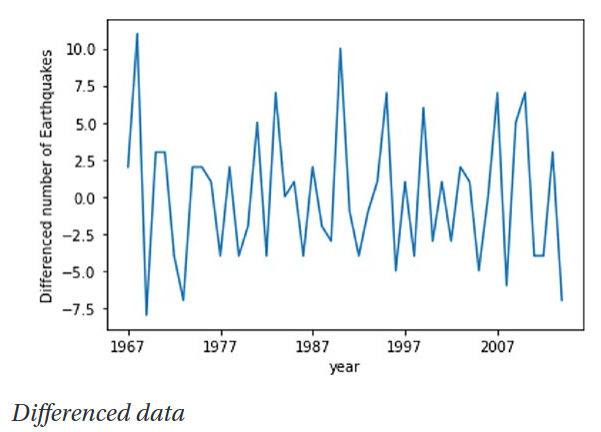

## Listing 3-9. Autocorrelation of the differenced data

In [ ]:
shifts_diff = pd.DataFrame(
    {
        'this year': differenced_data,
        'past year': differenced_data.shift(1)
    }
)

ax = shifts_diff.plot()
ax.set_ylabel('Differenced number of Earthquakes')
plt.show()

shifts_diff.corr()


## Listing 3-10. Autocorrelation of the differenced data

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(differenced_data, lags=20)
plt.show()


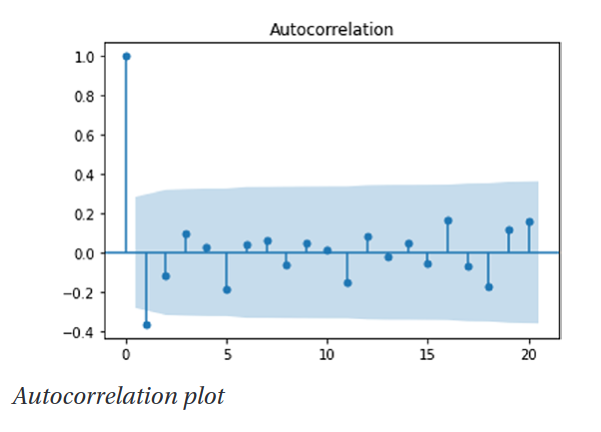

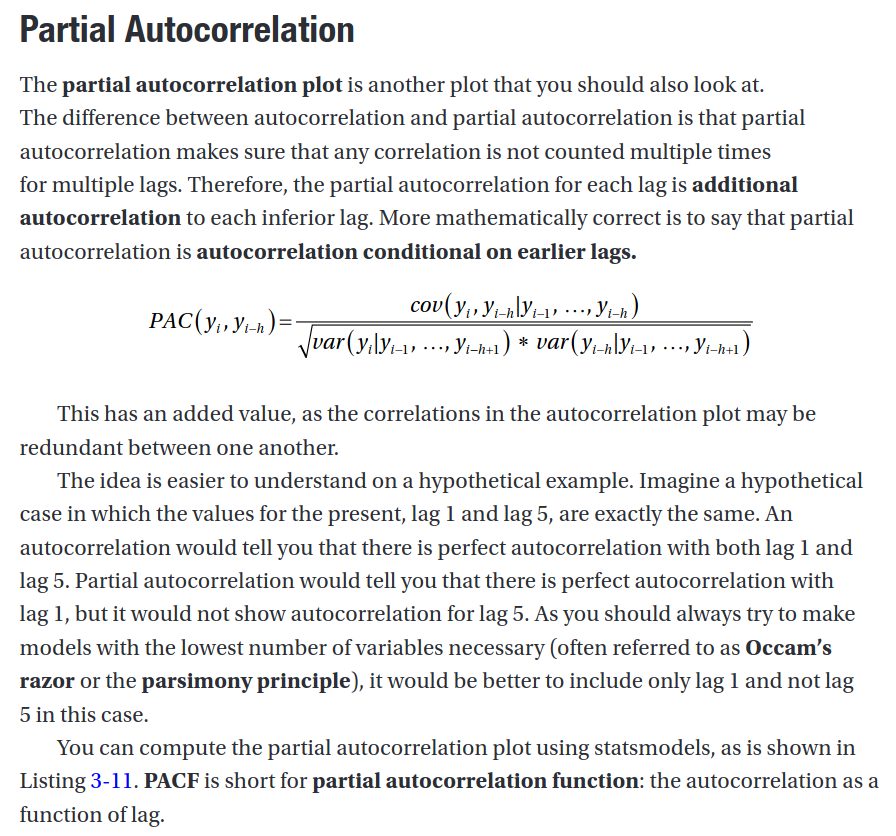

## Listing 3-11. Partial Autocorrelation of the differenced data

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(differenced_data, lags = 20)
plt.show()


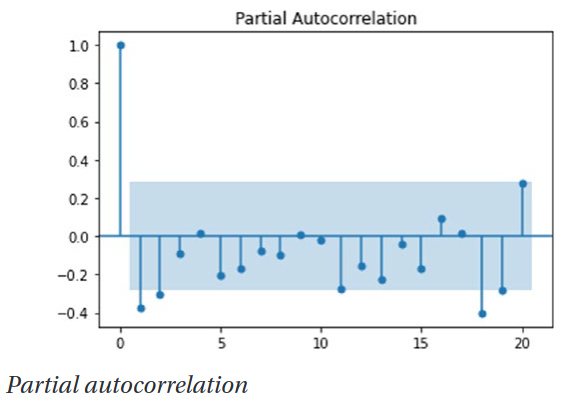

As you can see based on the
blue background shading in the graph, the PACF shows the first and the second lag
outside of the shaded area. This means that it would be interesting to also include the
second lag in the AR model.

**How Many Lags to Include?**

Now the big question in time series analysis is always how many lags to include. This is called the order of the time series. The notation is AR(1) for order 1 and AR(p) for an order p.

The order is up to you to decide. Theoretically speaking, you can base your order on the PACF graph. The theory tells you to take the number of lags before obtaining an autocorrelation of 0. All the other lags should be 0.

In the theory, you often see great graphs where the first spike is very high and the rest is equal to zero. In those cases, the choice is easy: you are working with a very “pure” example of AR(1). Another common case is when your autocorrelation starts high and slowly diminishes to zero. In this case, you should use all of the lags where the PACF is not yet zero.

In the earthquake example, there is still a bit of partial autocorrelation on further lags, and this goes on until very far lags. There is even a spike of PACF on lag 18. This could mean many things: maybe there really is autocorrelation with lags far away. Or maybe a hidden process is underlying that the AR model is not capturing well.

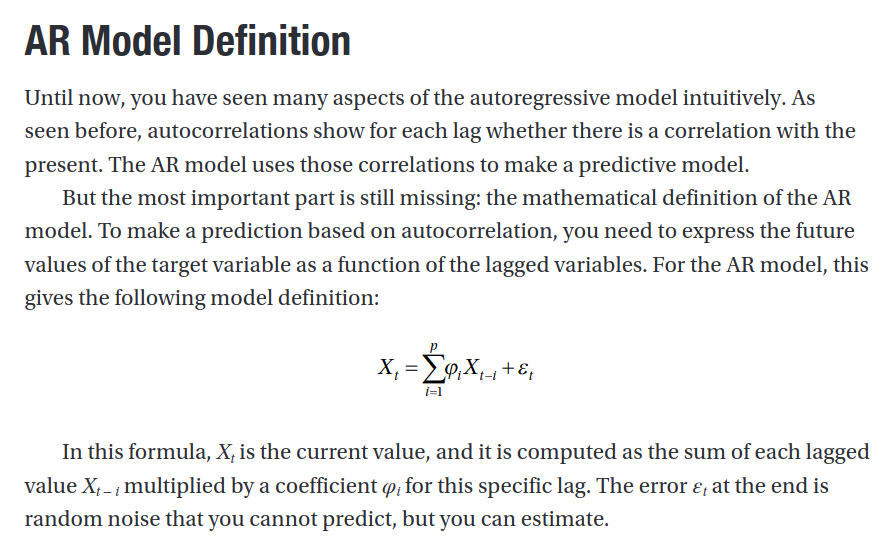

In the formula, you see that the past values (X(t − i)) are multiplied by a coefficient (φi). The sum of this will give you the current value X_t. When starting to fit the model, you already know the past values and the current value. The only thing you don’t know is the phis (φi). The phis are what needs to be found mathematically to define the model. Once you estimate those phis, you will be able to compute tomorrow’s value of Xt using the estimated phis and the known values of today and before.

For the AR model, different methods have been found to estimate the coefficients
(the phis), but the Yule-Walker method is generally accepted as the most appropriate method.

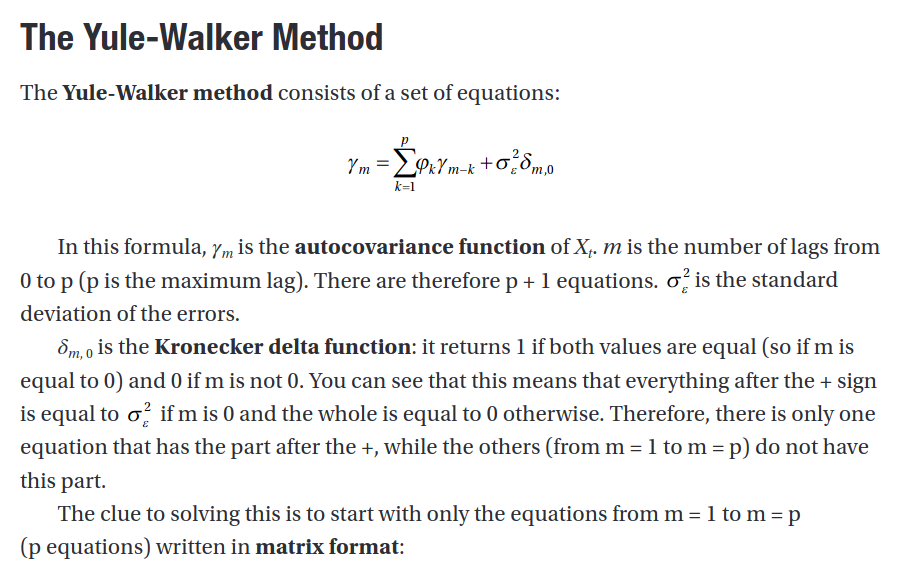

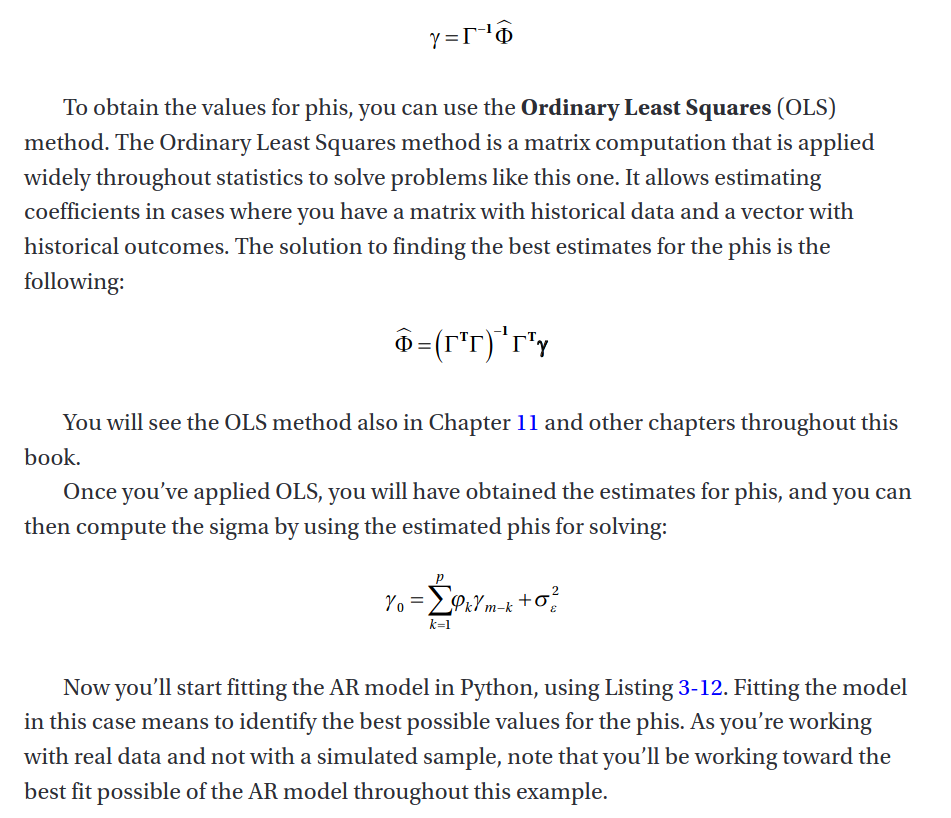

## Listing 3-12. Estimate Yule Walker AR coefficients with order 3

In [ ]:
from statsmodels.regression.linear_model import yule_walker
coefficients, sigma = yule_walker(differenced_data, order = 3)
print('coefficients: ', -coefficients)
print('sigma: ', sigma)


The coefficients that you obtain with this are the coefficients for each of the lagged variables. In this case, the order is 3, so that will need to be applied for the three last values to compute the new value. You can make a forecast by computing the next steps, based on the current coefficients. The code for this is shown in Listing 3-13. Attention:
The more steps forward you want to forecast, the more difficult it becomes – your error
will likely increase with the number of steps.

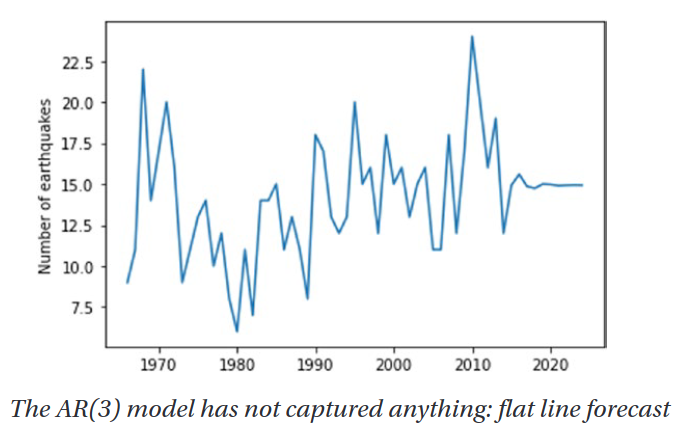

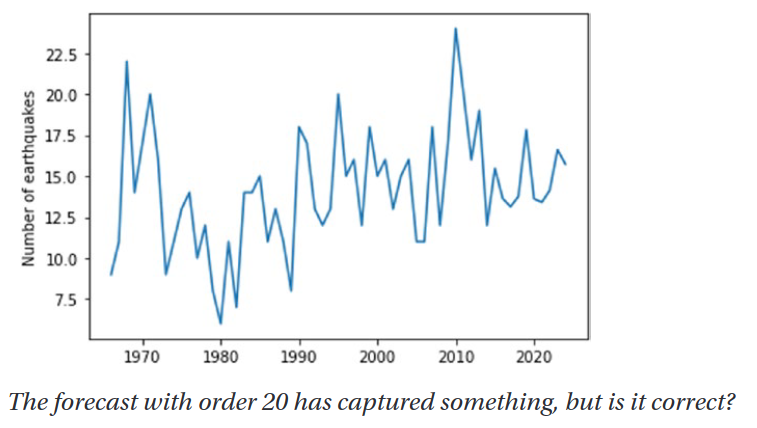

## Listing 3-13. Make a Forecast with the AR coefficients

In [ ]:
coefficients, sigma = yule_walker(differenced_data, order = 3)

# Make a list of differenced values
val_list = list(differenced_data)
# Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()
# Define the number of years to predict
n_steps = 10

# For each year to predict
for i in range(n_steps):

    # Compute the new value as the sum of lagged values multiplied by their corresponding coefficient
    new_val = 0
    for j in range(len(coefficients)):

        new_val += coefficients[j] * val_list[j]

    # Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

# Redo the reverse to have the order of time
val_list.reverse()

# Add the original first value back into the list and do a cumulative sum to undo the differencing
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

# Plot the newly obtained list
plt.plot(range(1966, 2025), new_val_list)
plt.ylabel('Number of earthquakes')
plt.show()


## Train-Test Evaluation and Tuning

In this case, let’s apply a train-test split. You will cut off the last 10 years of the dataset and use them as a test set. This allows you to fit your model using the rest of the data (the train set). Once you have fitted on the train set, you can compute the error between the test set and your prediction.

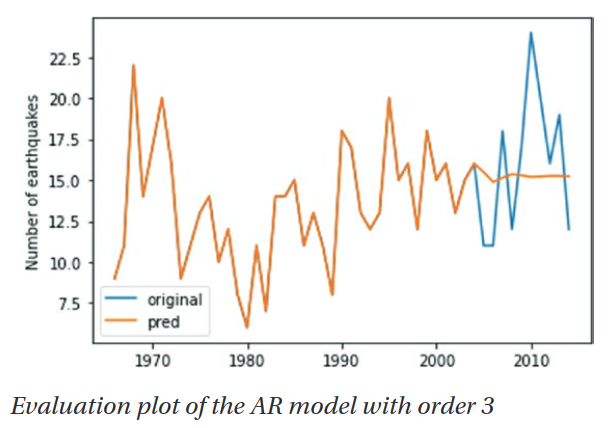

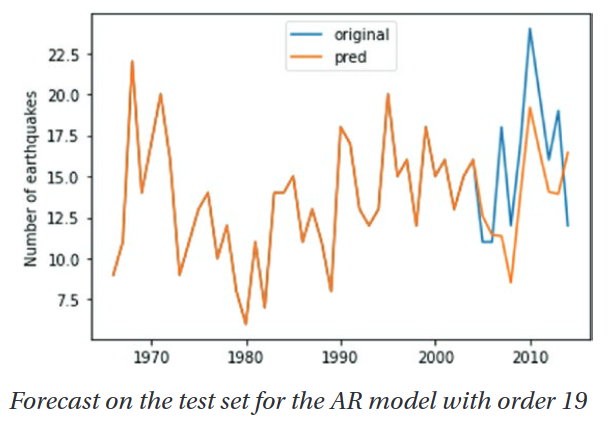

## Listing 3-14. Fit the model on a train set and evaluate it on a test set

In [ ]:
from sklearn.metrics import r2_score

train = list(differenced_data)[:-10]
test = list(earthquakes_per_year)[-10:]

coefficients, sigma = yule_walker(train, order = 3)

# Make a list of differenced values
val_list = list(train)
# Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()
# Define the number of years to predict
n_steps = 10

# For each year to predict
for i in range(n_steps):

    # Compute the new value as the sum of lagged values multiplied by their corresponding coefficient
    new_val = 0
    for j in range(len(coefficients)):

        new_val += coefficients[j] * val_list[j]

    # Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

# Redo the reverso to have the order of time
val_list.reverse()

# Add the original first value back into the list and do a cumulative sum to undo the differencing
val_list = [earthquakes_per_year[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

# Plot the newly obtained list
validation = pd.DataFrame({
    'original': earthquakes_per_year.reset_index(drop=True),
    'pred': new_val_list })

print('Test R2:', r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1]))

# Plot the newly obtained list
plt.plot(range(1966, 2015), validation)
plt.legend(validation.columns)
plt.ylabel('Number of earthquakes')
plt.show()


## Listing 3-15. Apply a grid search to find the order that gives the best R2 score on the test data

In [ ]:
def evaluate(order):
    train = list(differenced_data)[:-10]
    test = list(earthquakes_per_year)[-10:]

    coefficients, sigma = yule_walker(train, order = order)

    # Make a list of differenced values
    val_list = list(train)
    # Reverse the list to corresponds with the order of coefs
    val_list.reverse()
    # Define the number of years to predict
    n_steps = 10

    # For each year to predict
    for i in range(n_steps):

        # Compute the new value
        new_val = 0
        for j in range(len(coefficients)):
            new_val += coefficients[j] * val_list[j]

        # Insert the new value at the beginning of the list
        val_list.insert(0, new_val)

    # Redo the reverse to have the order of time
    val_list.reverse()

    # Undo the differencing with a cumsum
    val_list = [earthquakes_per_year[0]] + val_list
    new_val_list = pd.Series(val_list).cumsum()

    # Plot the newly obtained list
    validation = pd.DataFrame({
        'original': earthquakes_per_year.reset_index(drop=True),
        'pred': new_val_list })

    return r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1])

# For each order between 1 and 30, fit and evaluate the model
orders = []
r2scores = []
for order in range(1, 31):
    orders.append(order)
    r2scores.append(evaluate(order))

# Create a results data frame
results =pd.DataFrame({'orders': orders,
                      'scores': r2scores})

# Show the order with best R2 score
results[results['scores'] == results.max()['scores']]


This code will also make a plot for the model with order 19 and observe that,
although not perfect, the model indeed fits a bit better than the model with order 3.


The AR model is one of the basic building blocks of univariate time series. It can be used as a stand-alone model only in very rare and specific cases. In this real-life example of predicting earthquakes, the R2 score of 0.13 is not very good: you can surely do much better by including other building blocks of univariate time series.

We will discover these building blocks throughout the next sessions.